<a href="https://colab.research.google.com/github/laurlouie/Education-Inequality/blob/main/DATA_3320_Education_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Using  data science methodology to answer the question of whether school performance predicted by socioeconomic factors. This notebook will go in depth with specific questions targeted at the problem.

## Import libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection
from itertools import combinations
import statsmodels.api as sm

# Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

## Load clean data

Loading clean data csv files from GitHub, also found in my repository for this project.

In [25]:
X_test = pd.read_csv("https://github.com/laurlouie/Education-Inequality/raw/main/clean_X_test%20(1).csv")

In [26]:
X_train = pd.read_csv("https://github.com/laurlouie/Education-Inequality/raw/main/clean_X_train%20(1).csv")

In [27]:
Y_test = pd.read_csv("https://github.com/laurlouie/Education-Inequality/raw/main/clean_Y_test.csv")

In [28]:
Y_train = pd.read_csv("https://github.com/laurlouie/Education-Inequality/raw/main/clean_Y_train.csv")

In [52]:
clean_df = pd.read_csv("https://github.com/laurlouie/Education-Inequality/raw/main/clean_df%20(2).csv")

Reviewing the contents of each data set.

In [39]:
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 1102 to 423
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      909 non-null    int64  
 1   rate_unemployment       909 non-null    float64
 2   percent_college         909 non-null    float64
 3   percent_married         909 non-null    float64
 4   median_income           909 non-null    float64
 5   percent_lunch           909 non-null    float64
 6   percent_multilingual    909 non-null    float64
 7   english_secondlanguage  909 non-null    int64  
 8   state                   909 non-null    object 
 9   zip_code                909 non-null    int64  
 10  school_type             909 non-null    object 
 11  school_level            909 non-null    object 
 12  average_act             909 non-null    float64
dtypes: float64(7), int64(3), object(3)
memory usage: 99.4+ KB


,id,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,percent_multilingual,english_secondlanguage,state,zip_code,school_type,school_level,average_act
1102,370462002552,-1.096368,1.627193,1.522527,3.586724,-1.546506,0.067277,1912,NC,28104,Regular School,High,23.864469
646,170705000366,0.414372,0.766959,0.493523,0.267489,-0.646051,0.106429,2874,IL,60452,Regular School,High,20.700000
4307,174175004182,-1.215401,0.589784,0.813871,0.133561,-0.872109,0.012334,26,IL,62271,Regular School,High,20.600000
4707,390464202547,-0.588651,0.236681,0.337039,0.255385,-0.199481,0.009648,206,OH,43920,Regular School,High,22.000000
5679,370297001286,1.560876,-0.926469,-0.098306,-0.361160,1.134322,0.089327,3166,NC,28214,Regular School,High,17.393162


In [40]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3635 entries, 1146 to 4140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3635 non-null   int64  
 1   rate_unemployment       3635 non-null   float64
 2   percent_college         3635 non-null   float64
 3   percent_married         3635 non-null   float64
 4   median_income           3635 non-null   float64
 5   percent_lunch           3635 non-null   float64
 6   percent_multilingual    3634 non-null   float64
 7   english_secondlanguage  3635 non-null   int64  
 8   state                   3635 non-null   object 
 9   zip_code                3635 non-null   int64  
 10  school_type             3635 non-null   object 
 11  school_level            3635 non-null   object 
 12  average_act             3635 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 397.6+ KB


,id,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,percent_multilingual,english_secondlanguage,state,zip_code,school_type,school_level,average_act
1146,370234001008,0.170567,1.122431,-0.318379,-0.293212,-0.121045,0.040741,651,NC,28779,Regular School,High,21.056166
1357,370210000915,0.777195,0.169098,0.126784,-0.846076,0.023102,0.027624,60,NC,28726,Regular School,High,22.008547
3591,390438100747,0.645473,-1.325936,-0.802660,-0.814030,0.546796,0.019406,298,OH,44030,Regular School,High,20.000000
3397,262715006325,0.301076,-0.504550,0.416076,-0.051821,-0.739186,0.013964,49,MI,48831,Regular School,High,20.700000
4476,360009801959,0.616466,0.186889,-0.257923,0.186492,1.060637,0.313502,30310,NY,11385,Regular School,High,18.272283


In [41]:
Y_test.info()
Y_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 1102 to 423
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   average_act  909 non-null    float64
dtypes: float64(1)
memory usage: 14.2 KB


,average_act
1102,23.864469
646,20.700000
4307,20.600000
4707,22.000000
5679,17.393162


In [42]:
Y_train.info()
Y_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3635 entries, 1146 to 4140
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   average_act  3635 non-null   float64
dtypes: float64(1)
memory usage: 56.8 KB


,average_act
1146,21.056166
1357,22.008547
3591,20.000000
3397,20.700000
4476,18.272283


In [53]:
clean_df.info()
clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7100 non-null   int64  
 1   rate_unemployment       7100 non-null   float64
 2   percent_college         7100 non-null   float64
 3   percent_married         7100 non-null   float64
 4   median_income           7100 non-null   float64
 5   percent_lunch           7100 non-null   float64
 6   percent_multilingual    7100 non-null   float64
 7   english_secondlanguage  7100 non-null   int64  
 8   state                   7100 non-null   object 
 9   zip_code                7100 non-null   int64  
 10  school_type             7100 non-null   object 
 11  school_level            7100 non-null   object 
 12  average_act             7100 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 721.2+ KB


,id,rate_unemployment,percent_college,percent_married,median_income,percent_lunch,percent_multilingual,english_secondlanguage,state,zip_code,school_type,school_level,average_act
0,360008705188,1.286371,-0.606621,-1.999926,-1.020297,1.979933,0.345184,22905,NY,10463,Regular School,High,18.125763
1,360009805829,-0.648675,-0.831110,1.745578,-0.537844,1.020605,0.256957,6445,NY,11101,Regular School,High,18.223443
2,370378001530,-0.130896,-0.051852,-0.098379,-0.095848,0.137429,0.063012,2022,NC,27205,Regular School,High,20.665446
3,370297002886,-0.404490,0.874898,0.281299,-0.052477,-0.408861,0.159825,5404,NC,28273,Regular School,High,21.080586
4,421257006218,-0.550917,-1.398594,-0.282368,-0.686543,-0.643864,0.013726,41,PA,15845,Regular School,High,20.543346


## State your questions

The overall purpose of this project is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, some specific questions will need to be answered about the data.


##### $\rightarrow$ Specific questions about the data that will help solve the purpose of the project.

1.   Which feature(s) has the highest correlation with average ACT score?
2.   How do various socioeconomic factors influence ACT score?
3.   What is the relationship between ACT score and multilingualism?



## Analysis

First off we want to train the regression model  

In [56]:
X = clean_df[['median_income',
              'rate_unemployment',
              'percent_college',
              'percent_lunch',
              'percent_married']]
y = clean_df['average_act']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, Y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# The coefficients
print('Coefficients: \n', reg.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(Y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(Y_test, y_pred))

Coefficients: 
 [-0.03198701 -0.0999103   0.28707581 -1.8351421  -0.01281247]
Mean squared error: 2.38
Coefficient of determination: 0.62


### Regression visualizations

A standard linear regression table is shown below where the results predict the 'average_act' score based on features such as 'median_income', 'rate_unemployment', 'percent_college', 'percent_lunch', and 'percent_married'.

In [63]:
X = sm.add_constant(clean_df[['median_income', 'rate_unemployment', 'percent_college', 'percent_lunch', 'percent_married']])
y = clean_df['average_act']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2534.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        07:33:27   Log-Likelihood:                -12973.
No. Observations:                7100   AIC:                         2.596e+04
Df Residuals:                    7094   BIC:                         2.600e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                20.2865      0.01

The graph below shows uses both train and test model to calculate the predicted ACT scores based on socioeconomic factors and compared the to the actul average ACT scores.

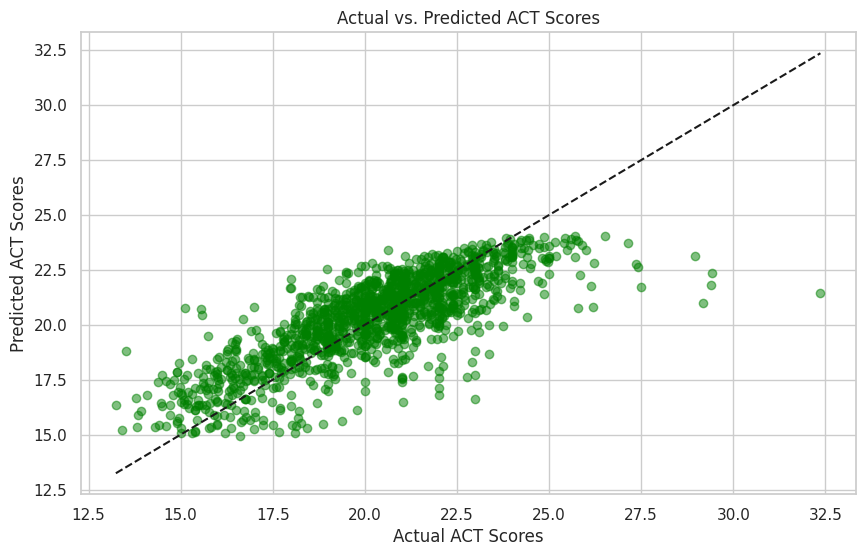

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, color='green', alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--')

plt.xlabel('Actual ACT Scores')
plt.ylabel('Predicted ACT Scores')

plt.title('Actual vs. Predicted ACT Scores')

plt.show()

## Specific questions about the data

The correlation matrix below includes the correlations between the kept features and the target variable "average_act", providing insight into how each feature is related to the target variable.

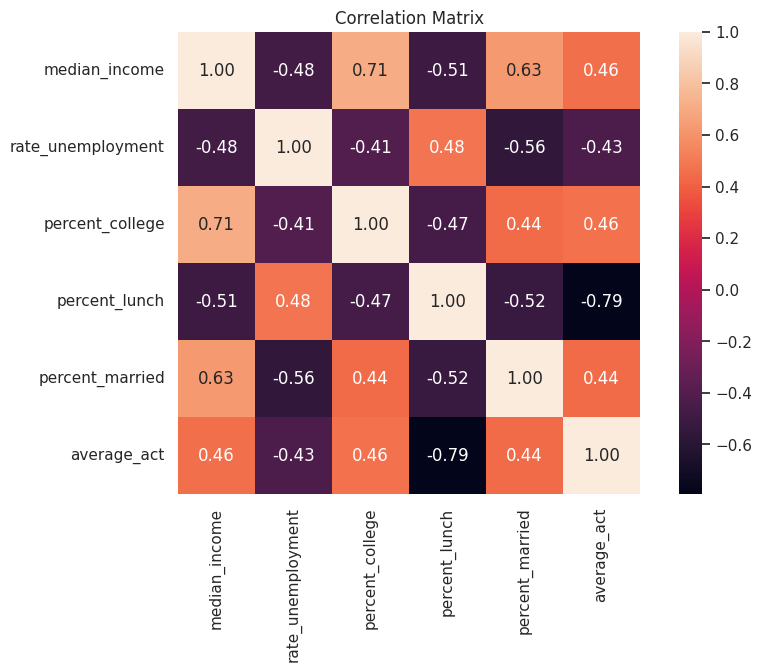

In [70]:
corr_matrix = clean_df[['median_income',
                        'rate_unemployment',
                        'percent_college',
                        'percent_lunch',
                        'percent_married',
                        'average_act']].corr()

# Plotting the correlation matrix with a different color range
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cbar=True,
            square=True)
plt.title('Correlation Matrix')
plt.show()

Answering the question of "How do various socioeconomic factors influence ACT score?", this code shows a series of scatterplots for each of the variables that were initally kept in the beginning of the notebook.

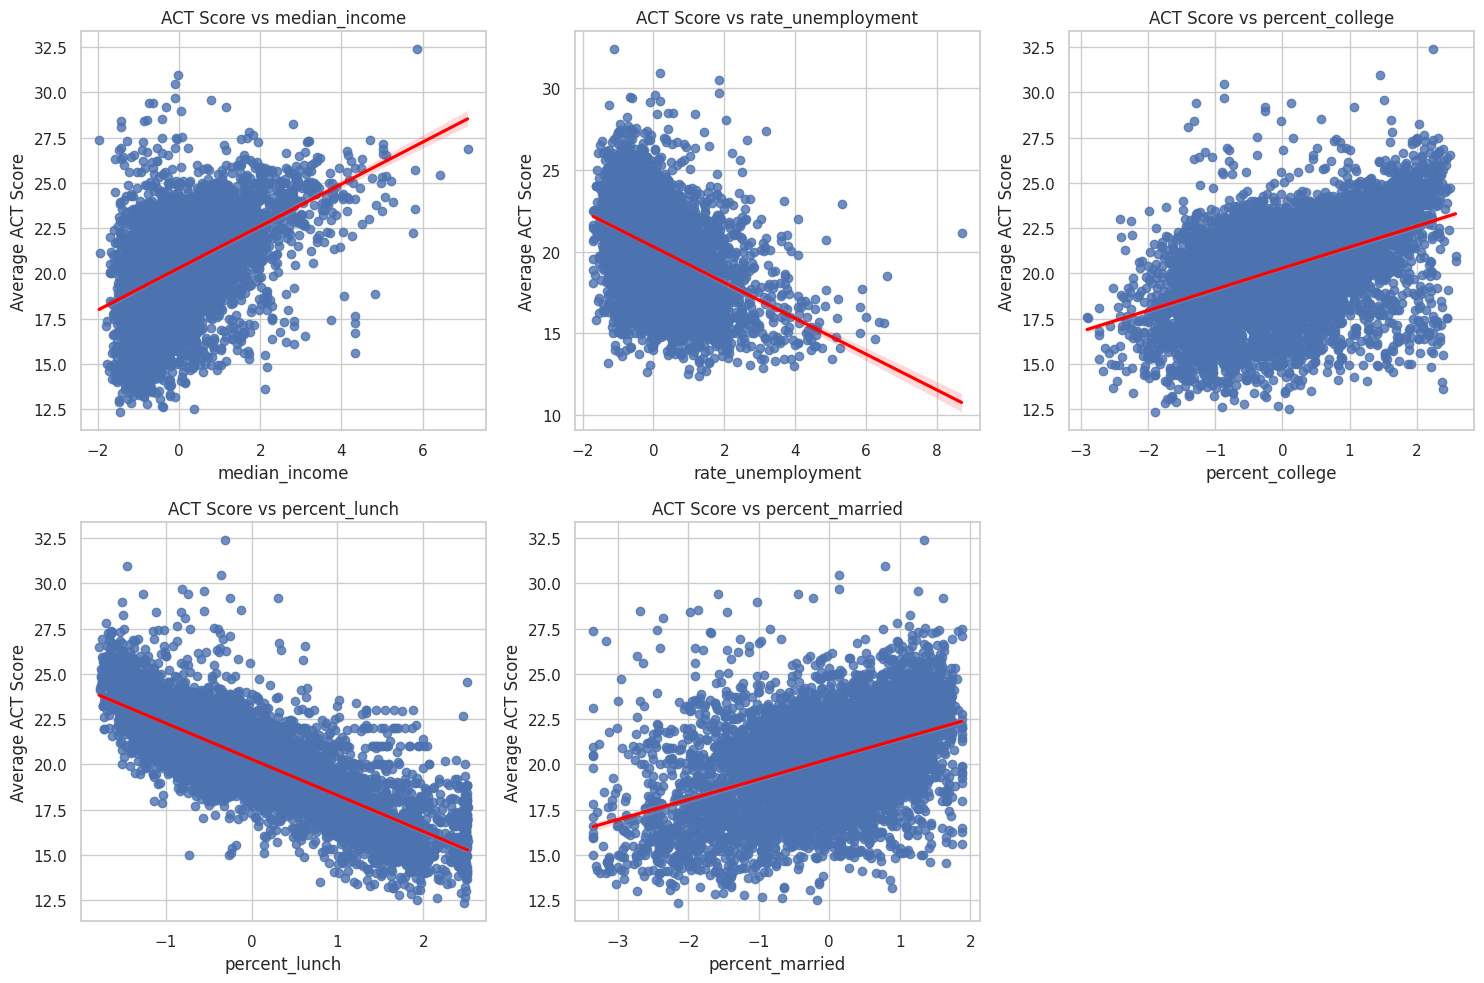

In [75]:
predictor_variables = ['median_income', 'rate_unemployment', 'percent_college', 'percent_lunch', 'percent_married']

# Create scatter plots with regression lines for each predictor variable
plt.figure(figsize=(15, 10))
for i, predictor in enumerate(predictor_variables,
                              start=1):
    plt.subplot(2, 3, i)
    sns.regplot(x=predictor,
                y='average_act',
                data=clean_df,
                line_kws={"color": "red"})
    plt.title(f'ACT Score vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Average ACT Score')

plt.tight_layout()
plt.show()

The visualization below answers the question of "What is the correlation between average ACT score and multilingualism?".

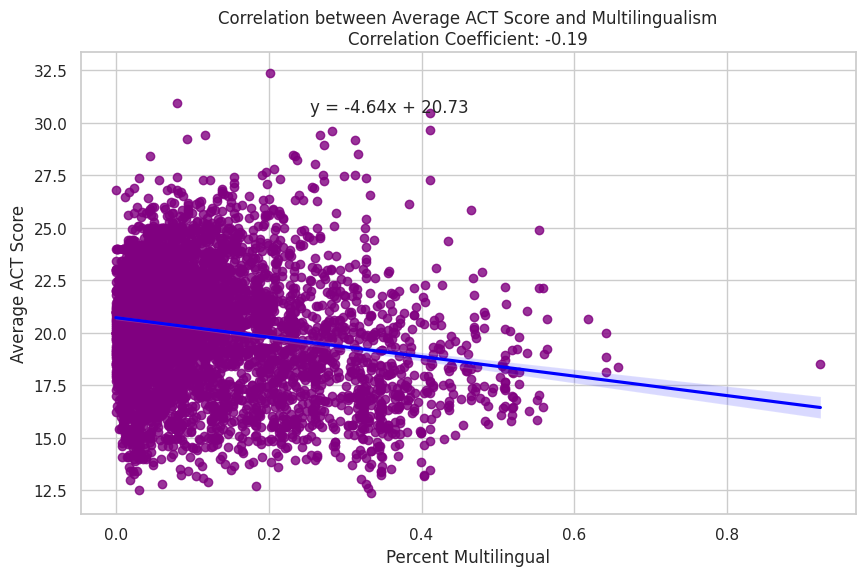

In [87]:
# Compute the correlation coefficient
correlation_coefficient = clean_df['average_act'].corr(clean_df['percent_multilingual'])

# Plot the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='percent_multilingual',
            y='average_act',
            color='purple',
            data=clean_df,
            line_kws={'color': 'blue'})  # Customize line color
plt.title(f'Correlation between Average ACT Score and Multilingualism\nCorrelation Coefficient: {correlation_coefficient:.2f}')
plt.xlabel('Percent Multilingual')
plt.ylabel('Average ACT Score')
plt.grid(True)

# Get regression line parameters
slope, intercept = np.polyfit(clean_df['percent_multilingual'], clean_df['average_act'], 1)

# Add equation of the regression line
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.5, 0.9,
         equation_text,
         fontsize=12,
         ha='right',
         va='top',
         transform=plt.gca().transAxes)

plt.show()

PUT THIS INTO THE SLIDES:
A correlation coefficient of -0.19 indicates a weak negative correlation between the variables 'average ACT score' and 'percent multilingual'.

Interpreting this value:
- The negative sign indicates that as one variable increases, the other tends to decrease.
- The magnitude of -0.19 suggests that the relationship is weak, meaning that the variables are not strongly linearly related.
- In this case, a correlation coefficient close to zero suggests that there is little to no linear relationship between the average ACT score and the percent of students who are multilingual.

However, it's important to note that correlation does not imply causation. A correlation of -0.19 between these variables does not necessarily imply a causal relationship between them. Other factors may influence both variables, and further analysis would be needed to determine the nature of the relationship.

## Conclusion

Provide a brief description of your conclusions.